## **Non Seasonal ARIMA Model**

To Successfully apply <tt>ARIMA Model</tt> to the timeseries, the timeseries should be stationary. A Stationary timeseries haa the following properties.

1. The Mean of the series should not be a function of time.
2. the Variance of the series should not be a function of time.
3. the co-Variance of the series shopuld also not the be the function of time.

A test, <i>Augmented Dickey-fuller</i> test can be performed on the series to check for the stationarity. 

Once we've established that the timeseries is non-stationary. We can start by making it stationary. This can be done through <tt>differencing.</tt> The idea behind differencing is the shift the series by 1 and take the difference with the original series. We can continue with this process untill we get some series which is stationary.  An ARIMA model consistes of three terms <tt>AR (Autoregression)</tt>, <tt>I (Integrated)</tt> and <tt>MA (Moving Average)</tt>. We represent these terms with the coefficients <tt>P,D & Q</tt>.

1. <u>**P = ORDER OF AR :**</u> p = 3 means that the Sales of Dec, Sales<sub>Dec</sub> depends on past 3 period i.e. Sales<sub>Nov</sub> , Sales<sub>Oct</sub> & Sales<sub>Sep</sub><br/>
the Sales of Nov, Sales<sub>Nov</sub> depends on past 3 period i.e. Sales<sub>Oct</sub> , Sales<sub>Sep</sub> & Sales<sub>Aug</sub><br/>

    P values can be found using PACF plots.

2. <u>**Moving Average :**</u> The y<sub>t</sub> has the effects of the previous error terms in it.

    y<sub>t</sub> = a + E<sub>t</sub> + b<sub>1</sub>E<sub>t-1</sub> + b<sub>2</sub>E<sub>t-2</sub>

    **Q = ORDER OF MA**

    Q values can be found using ACF plots.

3. <u>**Integrated ~~ Differenced :**</u> We take the difference of the value with it's previous values.

    DIFF<SUB>t</SUB> = Y<sub>t</sub> - Y<sub>t-1<sub> 

    **D = ORDER OF Difference** : This removes the effect of <u>**trends**</u> and <u>**seasonality**</u> form the series. The value D describes how many times we take the difference of the series.

## **AR (AutoRegression) Component**

We're going to start with a simplified model having <tt>D and Q</tt> as 0. this will give us the pure <tt>Autoregressive model</tt>. 

The <tt>Autoregression</tt> tells us how a value of the timeseries at time <tt>t</tt> is linearly related to its past values.

### $y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} + ... + \phi_py_{t-p} +  \epsilon_t$ 
here,

### $ c $ : Is the constant
### $ \phi_1,\phi_2 $ : Are the lag coefficient upto order <i>p</i>
### $ \epsilon_t $ : Is the white noise

The number of the time lag for the dependency would be the orders of the AR model. For eg. <tt>AR(1)</tt> model would be :

### $y_t = c + \phi_1y_{t-1} +  \epsilon_t$

<tt>AR(2)</tt> model would be :

### $y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} +  \epsilon_t$

The general form of this equation would be :

### $X_t = c + \sum\limits_{i=1}^p\phi_iX_{t-i} +  \epsilon_t$

The more the order we use, more accurate prediction would be, but there is a limit after which the result may deteriorate as we might be picking up more noise than the informations.

## **MA (Moving Average) Component**

We're going to start with a simplified model having <tt>P and D</tt> as 0. This will give us the pure <tt>Moving Average model</tt>. 

The <tt>Moving Average</tt> tells us how the errors between the values calculated using moving average and the real values of the timeseries at time <tt>t</tt> are linearly related.

i.e.

### $\epsilon_t = Real_t - Ma_t$

### $ X_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + ... + \theta_q\epsilon_{t-q}$

The general form of this equation would be :

### $X_t = \mu + \epsilon_t + \sum\limits_{i=1}^q\theta_i\epsilon_{t-i}$

So, hte value of <tt>Q</tt> specifies how many lagged values we need to consider while calculating the Moving Average component.

## **I (Integrated) Component**

We're going to start with a simplified model having <tt>P and Q</tt> as 0. This will give us the pure <tt>Integrated model</tt>. 

The <tt>Integrated</tt> tells us that the data values have been replaced with the difference between their values at time <tt>t</tt> and the previous values at time <tt>t-1</tt>

### $X_t - X_{t-1}$

<hr/>

From the AR and MA equation we have

### $X_t = c + \epsilon_t + \sum\limits_{i=1}^p\phi_iX_{t-i} + \sum\limits_{i=1}^q\theta_i\epsilon_{t-i}$

we can write this equation as,

### $c

Let's now see how to use <tt>auto_arima</tt>.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\airline_passengers.csv', index_col=['Month'], parse_dates=True)
df1.index.freq = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df2 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\DailyTotalFemaleBirths.csv', index_col=['Date'], parse_dates=True)
df2.index.freq = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Since it would be very difficult to choose values of <tt>P, M, D</tt> we use <tt>auto_arima</tt> to automatically figure out the best values. We're not splitting the dataset here as we're focussed on auto_arima and not the forcasting evaluation per se.

**Stationary Dataset**

In [4]:
from pmdarima import auto_arima

In [5]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.040, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [6]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Thu, 30 Dec 2021   AIC                           2459.074
Time:                        11:03:19   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Non-Stationary Dataset**

In [7]:
# m here is the period. since we have Monthly data, the period is 12. For Quarterly, the value of m would be 4 and for yearly, it should be 1
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=6, max_q=4, seasonal=True, trace=True, m=12) 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.39 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.46 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.45 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 30 Dec 2021   AIC                           1019.178
Time:                                     11:03:27   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Using ARMA and ARIMA Models**

In [9]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
df1 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\DailyTotalFemaleBirths.csv', index_col=['Date'], parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [85]:
df2 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\TradeInventories.csv', index_col=['Date'], parse_dates=True)
df2.index.freq = 'MS'
df2.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


### **ARMA**

<AxesSubplot:xlabel='Date'>

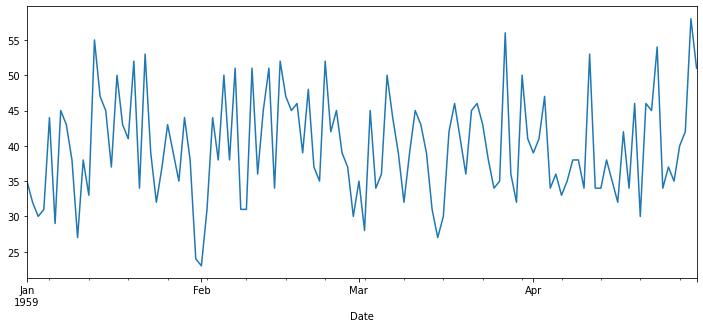

In [12]:
df1['Births'].plot(figsize=(12,5))

**Step 1 : Let's confirm the stationarity**

In [13]:
from statsmodels.tsa.stattools import adfuller

def parse_results(results):
    if results[1] <= 0.05:
        print("Time-series is Stationary")
    else:
        print("Time-series is Non-Stationary")

result1 = adfuller(df1['Births'])
parse_results(result1)

Time-series is Stationary


Since the series is stationary, the ARMA model will work.

**Step 2: Calculate the <tt>P, D & Q</tt>**

In [14]:
auto_arima(df1['Births'], seasonal=False, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.772 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Thu, 30 Dec 2021   AIC                            823.489
Time:                        11:03:28   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Step 3: Train-Test Split**

In [15]:
train = df1.iloc[:90]
test = df1.iloc[90:]

**Step 4: Modelling**

In [16]:
model = ARMA(train['Births'], order=(2,2));

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
results = model.fit()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Thu, 30 Dec 2021   AIC                            627.809
Time:                        11:03:29   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.608      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

**Step 5 : Predictions for testing**

In [19]:
start = len(train)
end = start + len(test) -1 

In [20]:
predictions = results.predict(start,end).rename('ARMA (2,2) Predictions')

<AxesSubplot:xlabel='Date'>

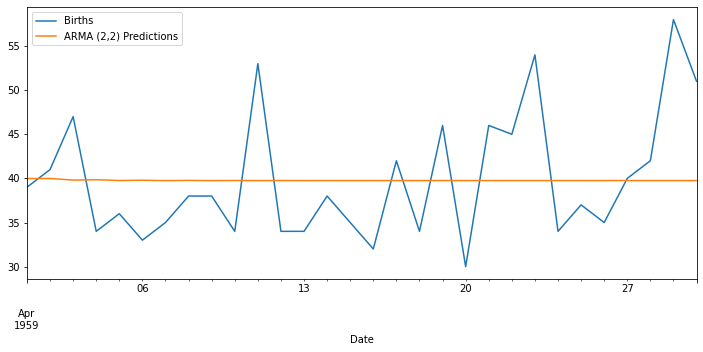

In [21]:
test.plot(figsize=(12,5), legend=True)
predictions.plot(figsize=(12,5), legend=True)

Here, the model has forcasted the average values. The model wasn't able to predict the noise though.

In [22]:
print("Mean of the test dataset is :", test.mean())
print("Mean predicted by the predictions is :", predictions.mean())

Mean of the test dataset is : Births    39.833333
dtype: float64
Mean predicted by the predictions is : 39.77743185601346


### **ARIMA**

**Step 1 : Let's confirm the Stationarity**

In [23]:
from statsmodels.tsa.stattools import adfuller

def parse_results(results):
    if results[1] <= 0.05:
        print("Time-series is Stationary")
    else:
        print("Time-series is Non-Stationary")

result = adfuller(df2['Inventories'])
parse_results(result)

Time-series is Non-Stationary


Since the series is non-stationary, let's visualize the components.

<AxesSubplot:xlabel='Date'>

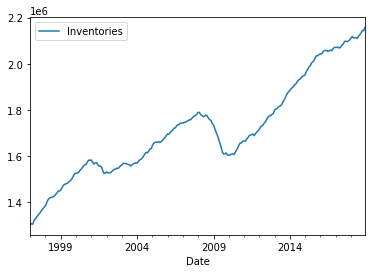

In [24]:
df2.plot()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

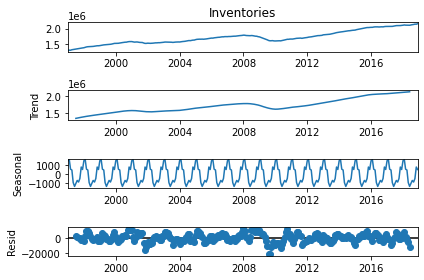

In [26]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

Here, we can omit using the seasonal models as the magnitude of seasonality is very less than trend and observed values.

**Step 2: Calculate the <tt>P, D & Q</tt>**

In [27]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 30 Dec 2021   AIC                           5348.037
Time:                        11:03:31   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
from statsmodels.tsa.statespace.tools import diff

In [86]:
diff_order = 2
df2['diff'] = diff(df2['Inventories'], k_diff=diff_order)
df2 = df2.dropna()

Let's see if the series became stationary after differencing

In [87]:
def parse_results(results):
    if results[1] <= 0.05:
        print("Time-series is Stationary")
    else:
        print("Time-series is Non-Stationary")

result = adfuller(df2['diff'])
parse_results(result)

Time-series is Stationary


Let's plot the ACF and PACF

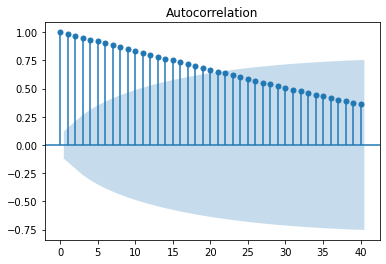

In [88]:
plot_acf(df2['Inventories'].dropna(), lags = 40);

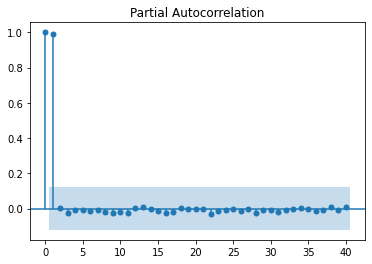

In [89]:
plot_pacf(df2['Inventories'], lags = 40);

In the video, Jose used (1,1,1) orders for Arima model. So we'll use that only.

**Step 3 : Train Test Split**

In [90]:
train = df2.iloc[:252]
test = df2.iloc[252:]

**Step 4 : Modelling**

In [91]:
from statsmodels.tsa.arima_model import ARIMA

In [92]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2483.374
Method:                       css-mle   S.D. of innovations           4786.680
Date:                Thu, 30 Dec 2021   AIC                           4974.747
Time:                        11:48:53   BIC                           4988.849
Sample:                    04-01-1997   HQIC                          4980.422
                         - 02-01-2018                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3576.5845   1393.241      2.567      0.010     845.883    6307.286
ar.L1.D.Inventories     0.9023      0.041     22.153      0.000       0.823       0.982
ma.L1.D.Inventories    -0.5375      0.084     -6.365      0.000      -0.703      -0.372
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1082           +0.0000j            1.1082            0.0000
MA.1            1.8604           +0.0000j            1.8604            0.0000
-----------------------------------------------------------------------------
"""

**Step 5 : Predictions for testing**

In [93]:
start = len(train)
end = start + len(test) - 1

In [97]:
# Here typ should be 'levels' as we need the original data, the default value of type is 'linear' which will return back the differenced version of the data.
predictions = results.predict(start,end, typ='levels').rename('ARIMA(1,1,1) Predictions')
predictions

2018-03-01    2.123937e+06
2018-04-01    2.129463e+06
2018-05-01    2.134799e+06
2018-06-01    2.139963e+06
2018-07-01    2.144973e+06
2018-08-01    2.149842e+06
2018-09-01    2.154585e+06
2018-10-01    2.159214e+06
2018-11-01    2.163741e+06
2018-12-01    2.168174e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

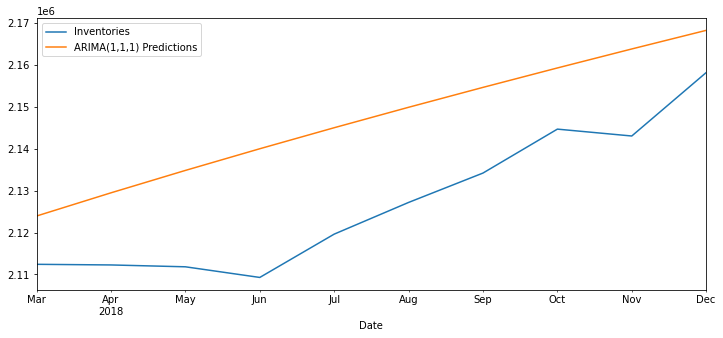

In [98]:
test['Inventories'].plot(figsize=(12,5), legend=True)
predictions.plot(figsize=(12,5), legend=True)

Above Predictions we made while ignoring the seasonal criterion, so ARIMA model (not seasonal) correctly predicted the trends. Let's evaluate the model and see the means of the values


**Step 6 : Evaluating the Model**

In [99]:
from statsmodels.tools.eval_measures import rmse

In [100]:
error = rmse(test['Inventories'], predictions)

In [101]:
error

20525.393661847927

In [102]:
test['Inventories'].mean()

2127255.1

In [103]:
predictions.mean()

2146869.111107732

So we see the mean of the test set and the predictions are quite close

**Step 7 : Forecasting**

In [108]:
model = ARIMA(df2['Inventories'], order=(1,1,1));
results = model.fit();
results.summary()

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  261
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2588.151
Method:                       css-mle   S.D. of innovations           4895.443
Date:                Thu, 30 Dec 2021   AIC                           5184.302
Time:                        12:00:23   BIC                           5198.560
Sample:                    04-01-1997   HQIC                          5190.033
                         - 12-01-2018                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3676.8500   1370.984      2.682      0.007     989.771    6363.929
ar.L1.D.Inventories     0.9048      0.039     22.933      0.000       0.827       0.982
ma.L1.D.Inventories    -0.5589      0.079     -7.045      0.000      -0.714      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1053           +0.0000j            1.1053            0.0000
MA.1            1.7892           +0.0000j            1.7892            0.0000
-----------------------------------------------------------------------------
"""

In [105]:
forecasts = results.predict(start=len(df2), end=len(df2) + 11, typ='levels').rename('ARIMA(1,1,1) Forecast')

<AxesSubplot:xlabel='Date'>

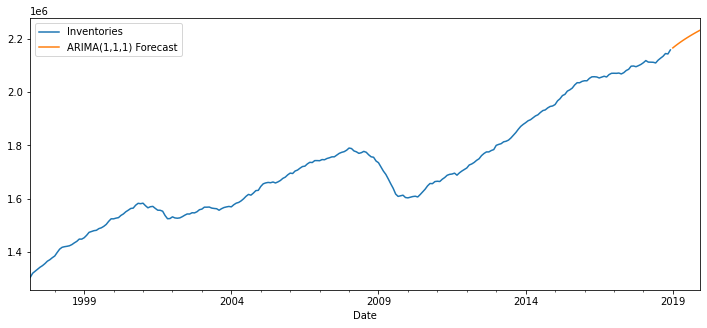

In [106]:
df2['Inventories'].plot(figsize=(12,5), legend=True)
forecasts.plot(figsize=(12,5), legend=True)